# World Population Analysis

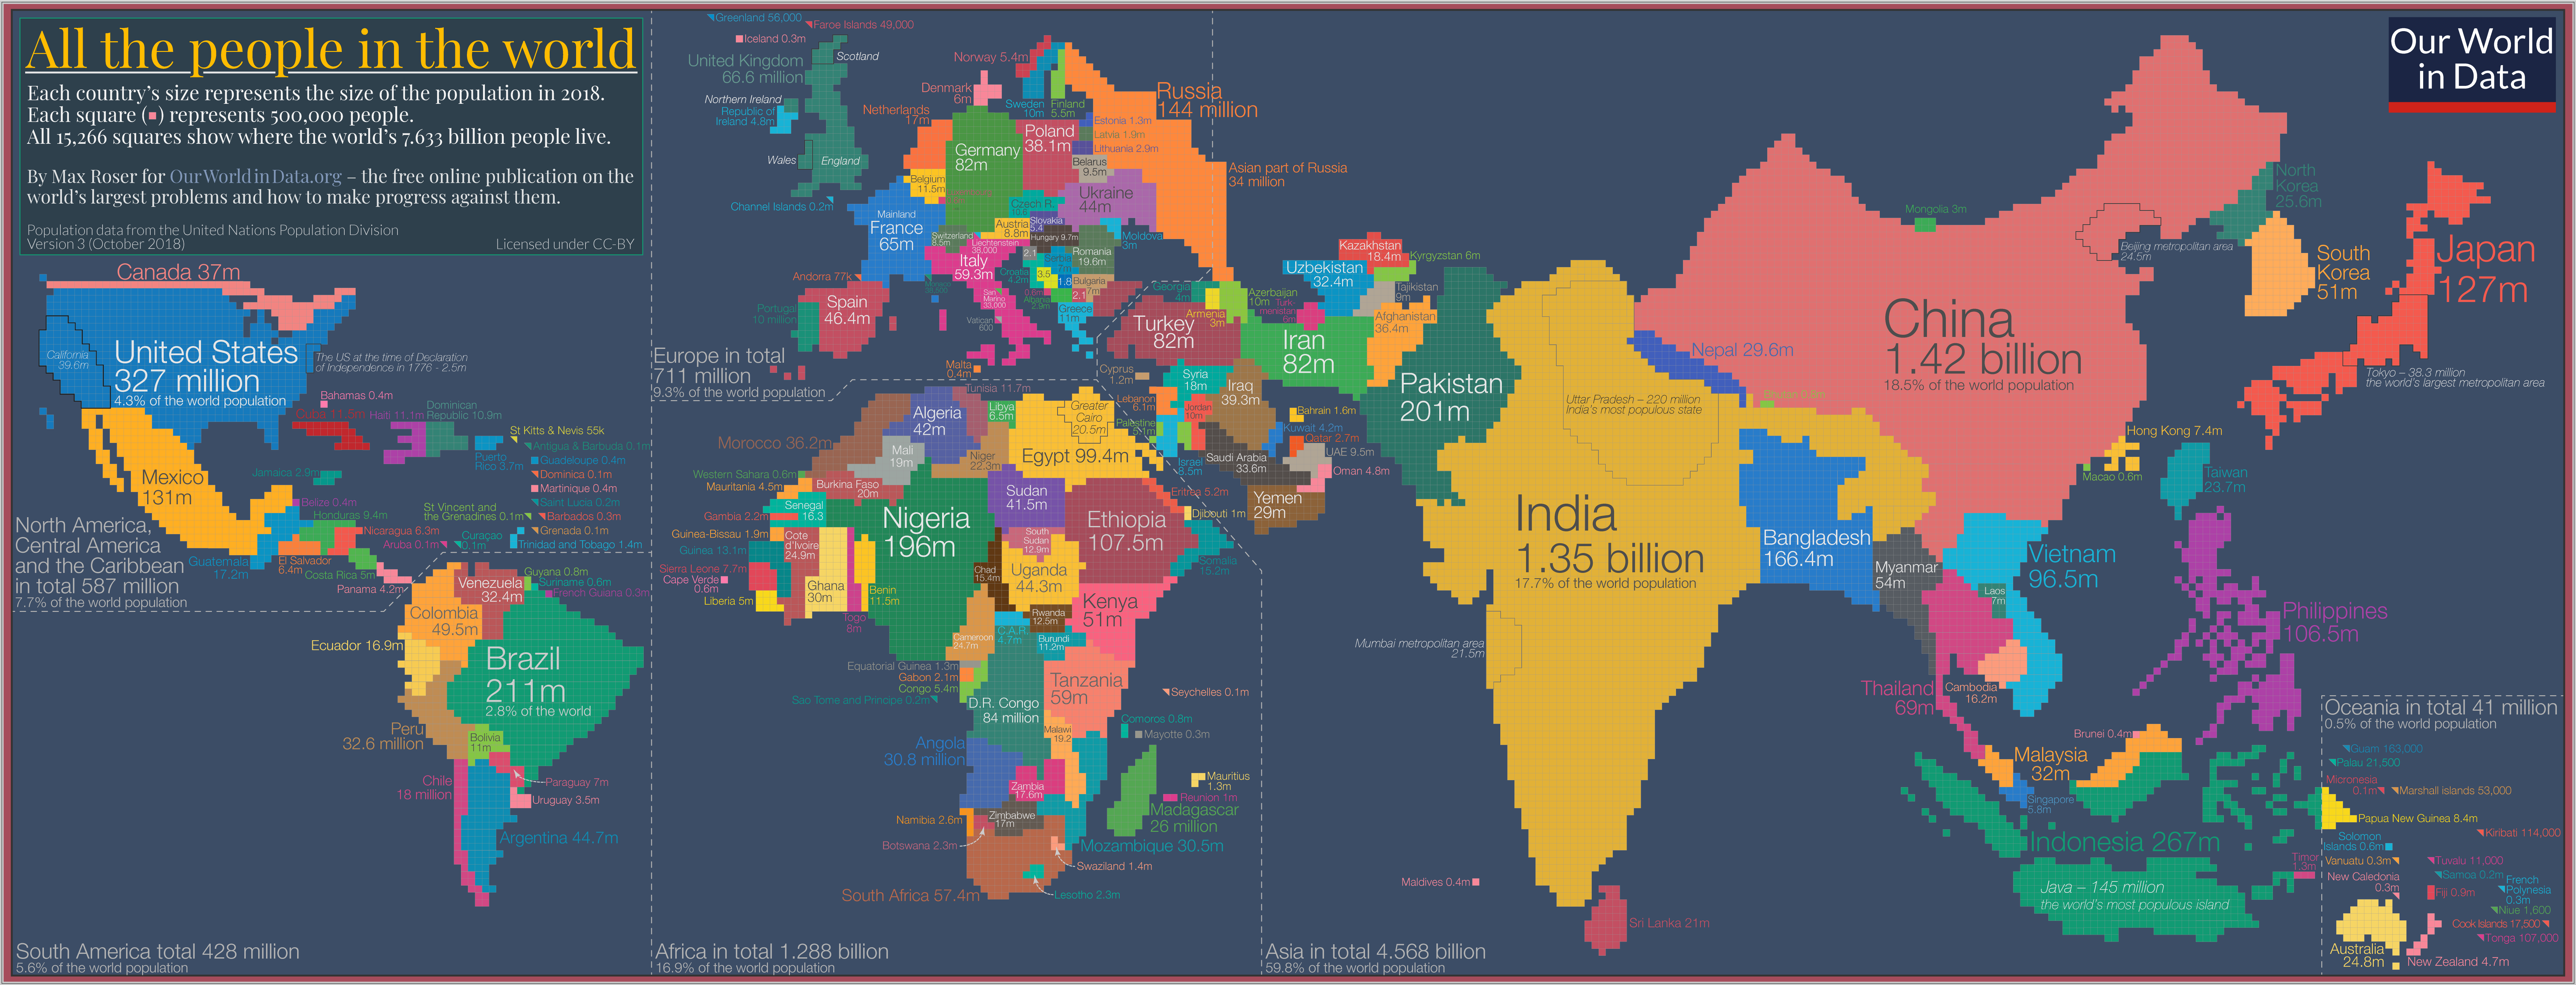

## Loading The Data

In [2]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [29]:
df = pd.read_csv('/Users/JumpMan/Downloads/Kaggle DataSets /World Population Growth 2024/Wprld population growth rate by cities 2024.csv')

In [4]:
df.head(10)

,City,Country,Continent,Population (2023),Population (2024),Growth Rate
0,Tokyo,Japan,Asia,37194105,37115035,-0.0021
1,Delhi,India,Asia,32941309,33807403,0.0263
2,Shanghai,China,Asia,29210808,29867918,0.0225
3,Dhaka,Bangladesh,Asia,23209616,23935652,0.0313
4,Sao Paulo,Brazil,South America,22619736,22806704,0.0083
5,Cairo,Egypt,Africa,22183201,22623874,0.0199
6,Mexico City,Mexico,North America,22281442,22505315,0.0100
7,Beijing,China,Asia,21766214,22189082,0.0194
8,Mumbai,India,Asia,21296517,21673149,0.0177
9,Osaka,Japan,Asia,19013434,18967459,-0.0024


In [5]:
#checking for missing values
missing_values = df.isnull().sum()

In [8]:
#printing the missing values
world = df.dropna()
world

,City,Country,Continent,Population (2023),Population (2024),Growth Rate
0,Tokyo,Japan,Asia,37194105,37115035,-0.0021
1,Delhi,India,Asia,32941309,33807403,0.0263
2,Shanghai,China,Asia,29210808,29867918,0.0225
3,Dhaka,Bangladesh,Asia,23209616,23935652,0.0313
4,Sao Paulo,Brazil,South America,22619736,22806704,0.0083
...,...,...,...,...,...,...
796,Bhavnagar,India,Asia,737128,751493,0.0195
797,Sheffield,United Kingdom,Europe,745876,751303,0.0073
798,Huambo,Angola,Africa,727641,751297,0.0325
799,Ribeirao Preto,Brazil,South America,742115,750174,0.0109


In [9]:
#Check the number of missing values again to confirm the processing result
missing_values_after = world.isnull().sum()
print(missing_values_after)

City                 0
Country              0
Continent            0
Population (2023)    0
Population (2024)    0
Growth Rate          0
dtype: int64


## Exploratory Analysis

__Summary Statistics__

In [11]:
#Summary Statistics 
def calculate_summary_stats(group):
    return pd.Series({
        'Mean': group.mean(),
        'Median': group.median(),
        'Std Dev': group.std(),
        'Range': group.max() - group.min()

    })
#Country-level summary statistics
country_stats = world.groupby('Country')['Growth Rate'].apply(calculate_summary_stats)
print("Country-Level Summary Statistics")
print(country_stats)

Country-Level Summary Statistics
Country             
Afghanistan  Mean       0.03040
             Median     0.03040
             Std Dev        NaN
             Range      0.00000
Algeria      Mean       0.01655
                         ...   
Zambia       Range      0.00640
Zimbabwe     Mean       0.01590
             Median     0.01590
             Std Dev        NaN
             Range      0.00000
Name: Growth Rate, Length: 512, dtype: float64


__Overall Summary stats__

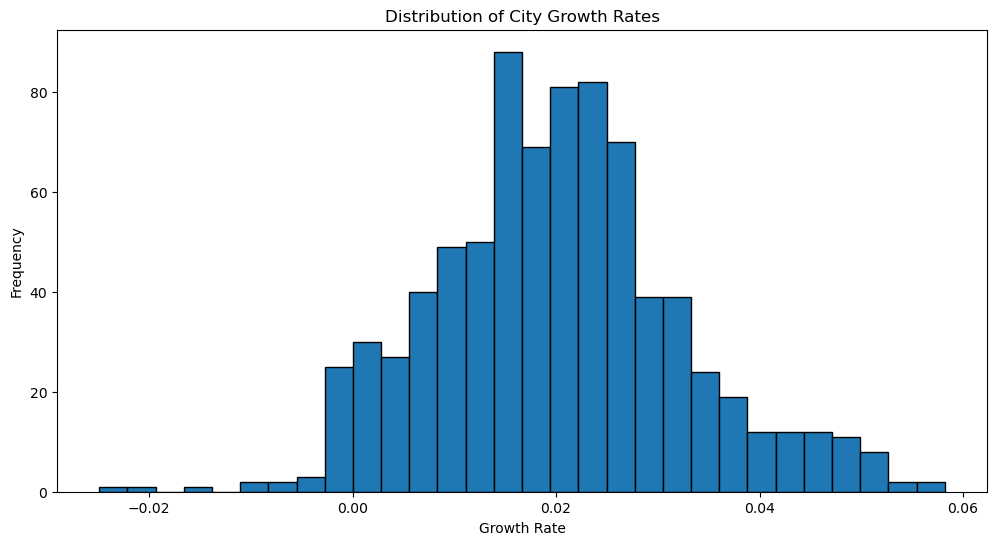

In [12]:
# Histogram
plt.figure(figsize=(12, 6))
plt.hist(df['Growth Rate'], bins=30, edgecolor='black')
plt.title('Distribution of City Growth Rates')
plt.xlabel('Growth Rate')
plt.ylabel('Frequency')
plt.show()

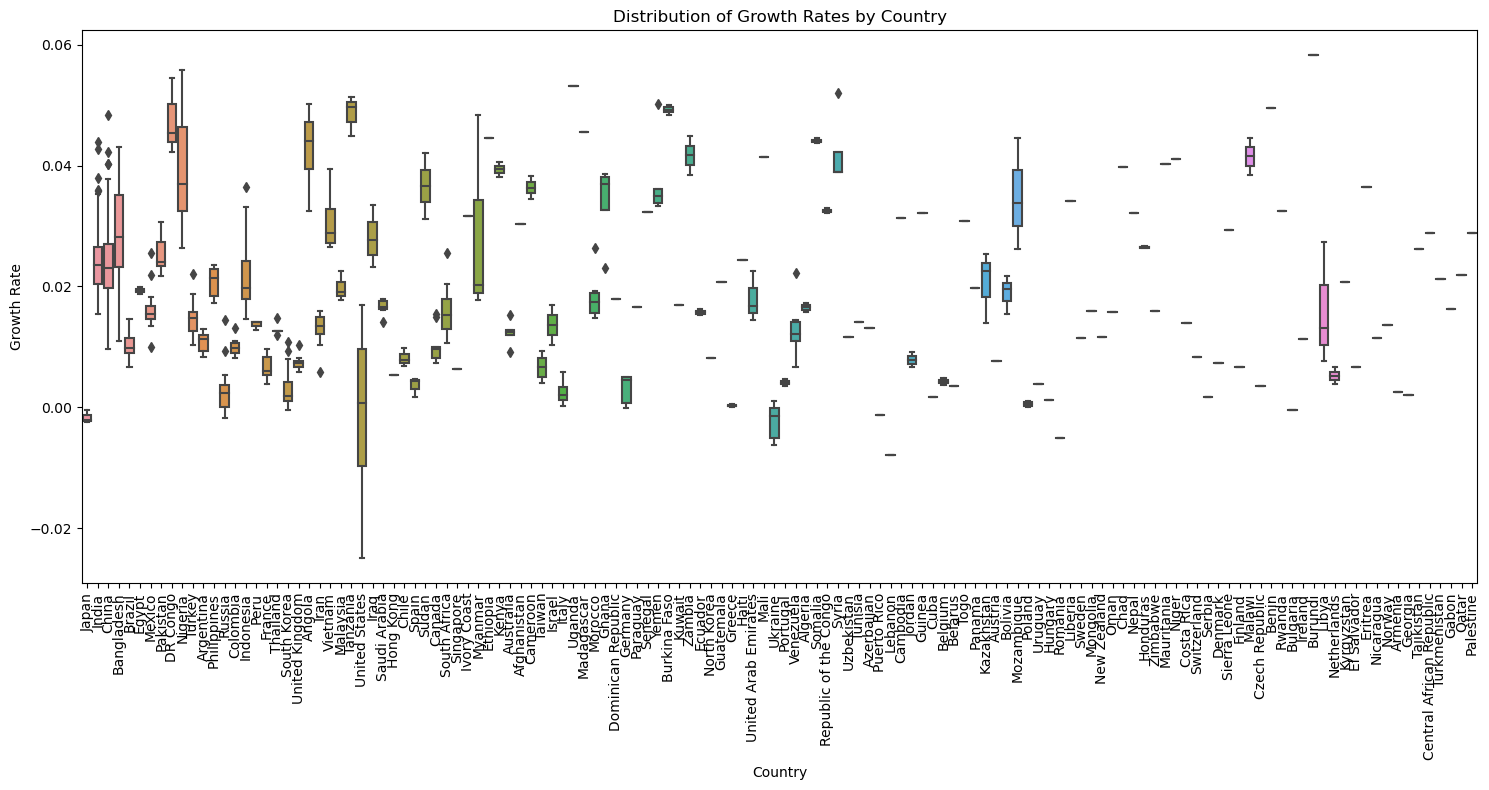

In [14]:
# Box Plot by Country
plt.figure(figsize=(15, 8))
sns.boxplot(x='Country', y='Growth Rate', data=df)
plt.title('Distribution of Growth Rates by Country')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

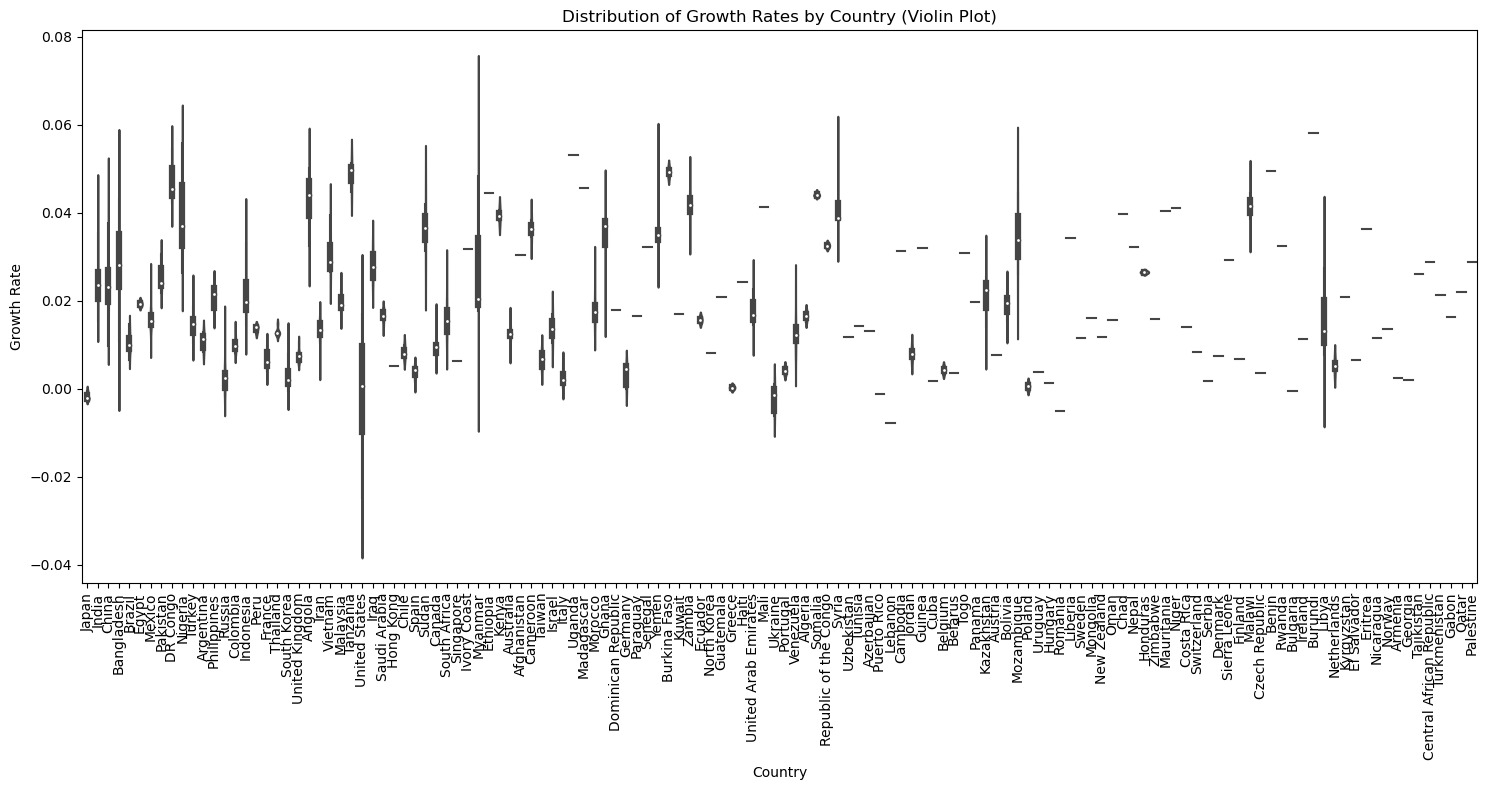

In [15]:
# Violin Plot (alternative to box plot, shows density)
plt.figure(figsize=(15, 8))
sns.violinplot(x='Country', y='Growth Rate', data=df)
plt.title('Distribution of Growth Rates by Country (Violin Plot)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

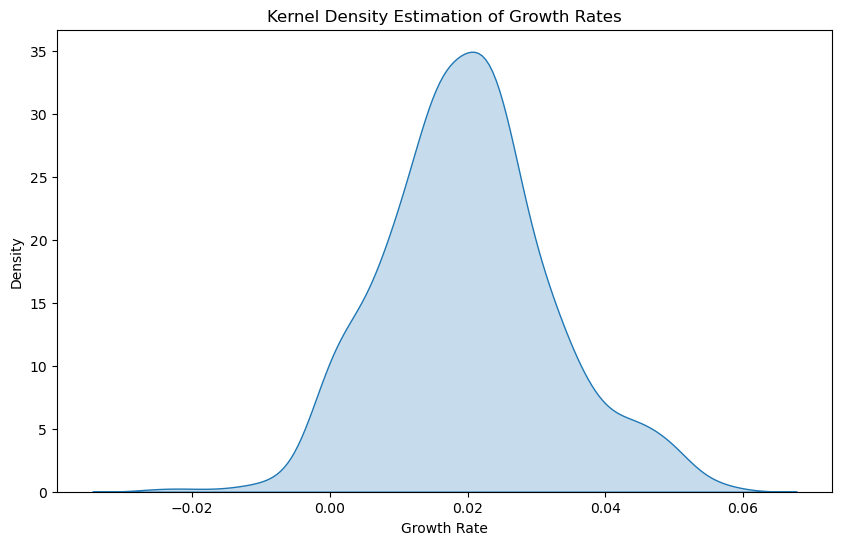

In [16]:
# Kernel Density Estimation (KDE) Plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df['Growth Rate'], shade=True)
plt.title('Kernel Density Estimation of Growth Rates')
plt.xlabel('Growth Rate')
plt.show()

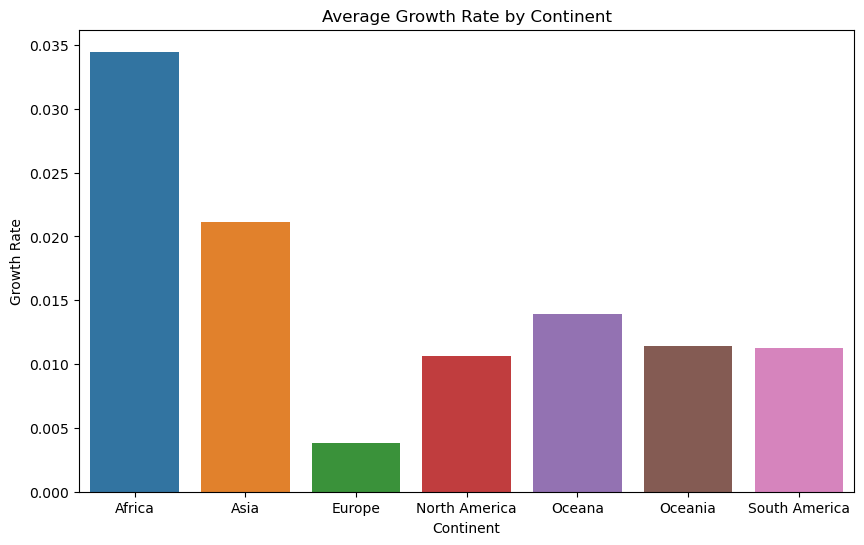

In [21]:
# Calculate the total population and average growth rate for each continent
continent_summary = world.groupby('Continent').agg({
    'Population (2024)': 'sum',
    'Population (2023)': 'sum',
    'Growth Rate': 'mean'
}).reset_index()

#print(continent_summary)

# Visualize the average growth rate for each continent
plt.figure(figsize=(10, 6))
sns.barplot(data=continent_summary, x='Continent', y='Growth Rate')
plt.title('Average Growth Rate by Continent')
plt.show()

          Country  Population (2024)  Population (2023)  Growth Rate
16        Burundi            1277050            1206767     0.058200
116        Uganda            4050826            3846102     0.053200
15   Burkina Faso            1185053            1128646     0.050000
11          Benin            1314916            1252890     0.049500
110      Tanzania           10375095            9886629     0.048567
26       DR Congo           30289277           28989304     0.046944
63     Madagascar            4048666            3872264     0.045600
32       Ethiopia            5703628            5460591     0.044500
100       Somalia            4696977            4497810     0.044133
2          Angola           14018657           13475912     0.042800


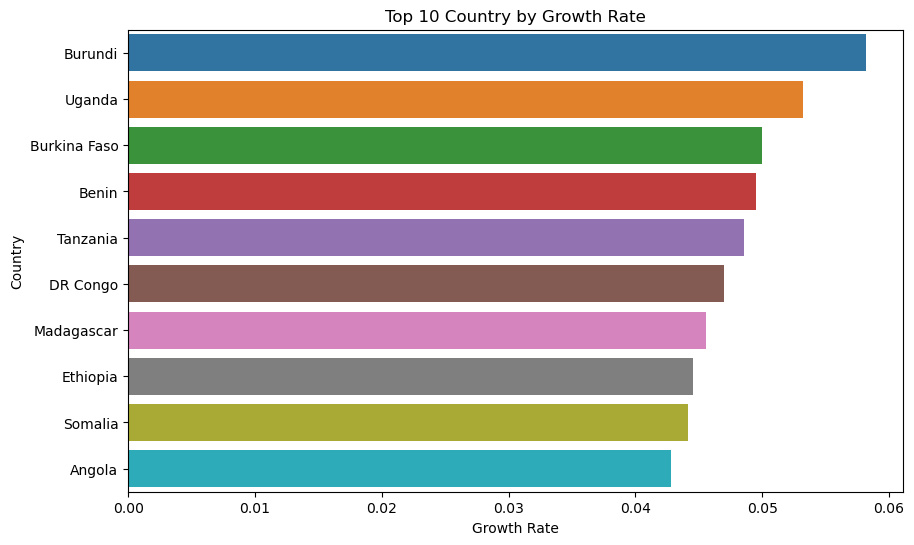

In [22]:
# Calculate the total population and average growth rate for each country
country = world.groupby('Country').agg({
    'Population (2024)': 'sum',
    'Population (2023)': 'sum',
    'Growth Rate': 'mean'
}).reset_index()

# Sort by growth rate and select the top 10 Country
top_10_country = country.sort_values(by='Growth Rate', ascending=False).head(10)
print(top_10_country)

# Visualize the top 10 Country by growth rate
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_country, x='Growth Rate', y='Country')
plt.title('Top 10 Country by Growth Rate')
plt.show()

           Country  Population (2024)  Population (2023)  Growth Rate
60         Lebanon            2402485            2421354    -0.007800
92         Romania            1767520            1776385    -0.005000
117        Ukraine            7265777            7274859    -0.002360
54           Japan           81914156           82078367    -0.001733
90     Puerto Rico            2436620            2439564    -0.001200
120  United States           31322184           31561393    -0.000888
14        Bulgaria            1287540            1288114    -0.000400
39          Greece            3969571            3968987     0.000300
88          Poland            2568847            2566933     0.000550
45         Hungary            1780391            1778052     0.001300


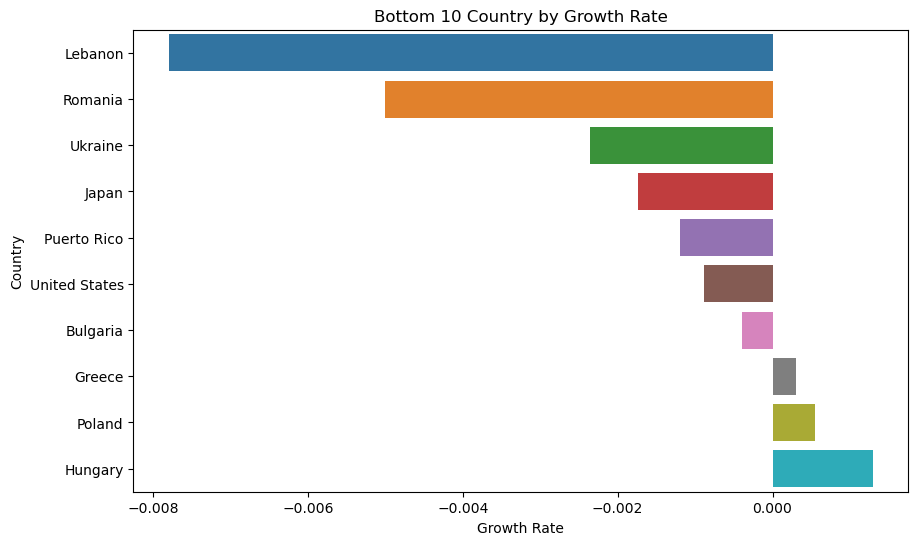

In [23]:
# Sort by growth rate and select the bottom 10 Country
bottom_10_country = country.sort_values(by='Growth Rate', ascending=True).head(10)
print(bottom_10_country)

# Visualize the bottom 10 Country by growth rate
plt.figure(figsize=(10, 6))
sns.barplot(data=bottom_10_country, x='Growth Rate', y='Country')
plt.title('Bottom 10 Country by Growth Rate')
plt.show()

                   Population (2024)  Population (2023)  Growth Rate
Population (2024)           1.000000           0.999896    -0.047556
Population (2023)           0.999896           1.000000    -0.055769
Growth Rate                -0.047556          -0.055769     1.000000


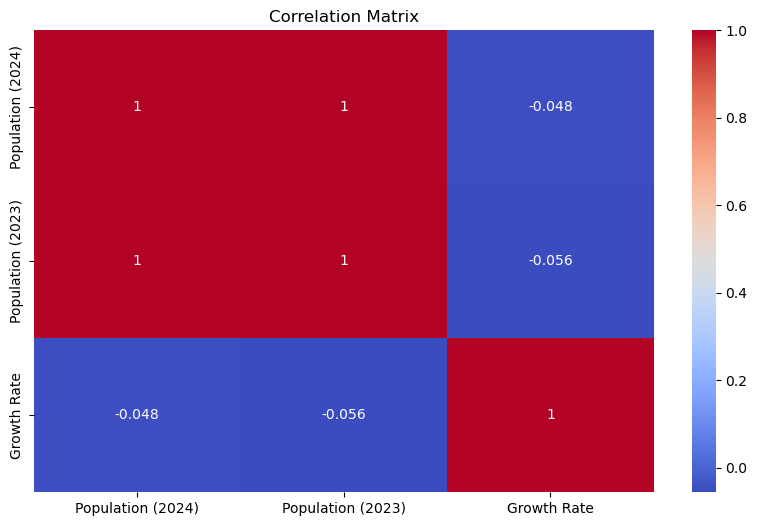

In [25]:
# Calculate the correlation matrix
correlation_matrix = world[['Population (2024)', 'Population (2023)', 'Growth Rate']].corr()
print(correlation_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


## ML Analysis

In [26]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
# Assuming 'Growth Rate' is the target variable and other columns are features
features = ['Population 2023', 'Population 2024']  # Add other relevant features
X = df[features]
y = df['Growth Rate']

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Clustering Algorithms:
__K-Means Clustering__

In [38]:
import plotly.express as px

In [42]:
def kmeans_clustering(X_scaled, n_clusters=5):
    # Initialize the K-means algorithm
    # n_clusters: number of clusters to form
    # random_state: set for reproducibility of results
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    
    # Fit the model to the data and predict cluster labels
    # fit_predict() combines fitting the model and predicting cluster labels
    # This returns an array of cluster labels (0 to n_clusters-1) for each data point
    clusters = kmeans.fit_predict(X_scaled)
    
    # Add the cluster labels to the DataFrame
    df['Cluster'] = clusters
    
    # Visualize the clusters using Plotly
    fig = px.scatter(
        df, 
        x=X_scaled[:, 0], 
        y='Growth Rate', 
        color='Continent', 
        symbol='Cluster', 
        hover_data=['City'],  # Add city names to hover data
        title='K-means Clustering of Cities',
        labels={'x': 'Normalized Population', 'y': 'Growth Rate'}
    )
    
    # Show the plot
    fig.show()
    
    # Return the cluster assignments for each data point
    return clusters

# Apply the K-means clustering function to our scaled data
clusters = kmeans_clustering(X_scaled)

# Add a new column 'Cluster' to the original dataframe
# This assigns each city its cluster label
df['Cluster'] = clusters

# Regression Algorithms
__Linear Regression__

Linear Regression - MSE: 0.0001, R2: 0.3328


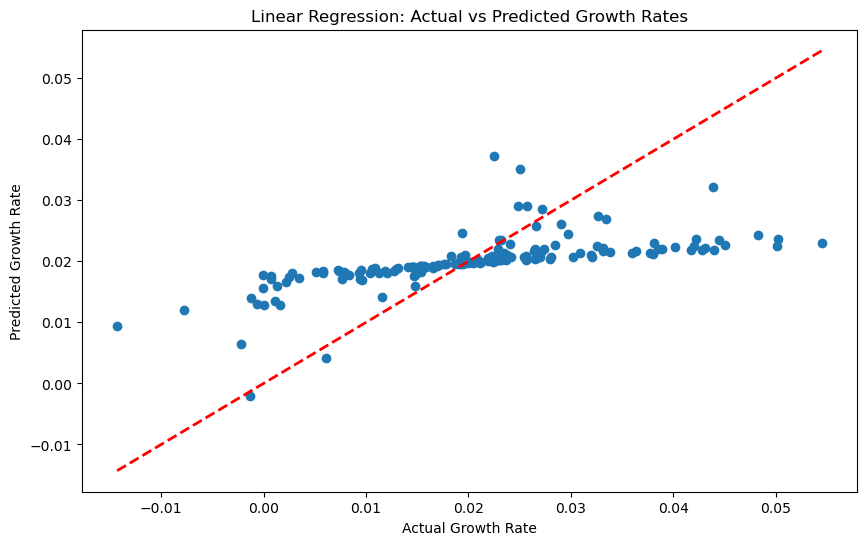

In [44]:
def linear_regression(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Linear Regression - MSE: {mse:.4f}, R2: {r2:.4f}")
    
    # Visualize predictions vs actual
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual Growth Rate')
    plt.ylabel('Predicted Growth Rate')
    plt.title('Linear Regression: Actual vs Predicted Growth Rates')
    plt.show()
    
    return model

linear_model = linear_regression(X, y)

# Linear Regression Results Summary

**Mean Squared Error (MSE):** 0.0001  
**Interpretation:** The model's predictions are very close to the actual growth rates, as indicated by the low MSE. This means that, on average, the squared differences between the predicted and actual values are small.

**R-squared (R²):** 0.3328  
**Interpretation:** The model explains approximately 33.28% of the variance in the population growth rates. While this indicates that the model captures some of the underlying patterns, a significant portion (about 66.72%) of the variance remains unexplained. This suggests that there are other factors influencing the growth rates that are not included in the model.

## Conclusion

The Linear Regression model provides reasonably accurate predictions, as evidenced by the low MSE.  
However, the R² value indicates that the model only partially explains the variance in growth rates, suggesting the need for additional features or more complex models to improve predictive power.


__Random Forest Regression__

Random Forest Regression - MSE: 0.0001, R2: 0.4275


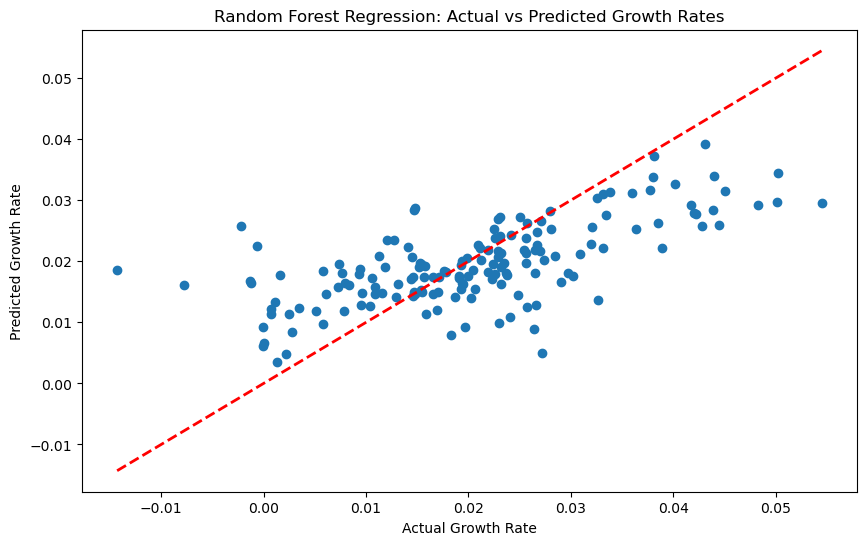

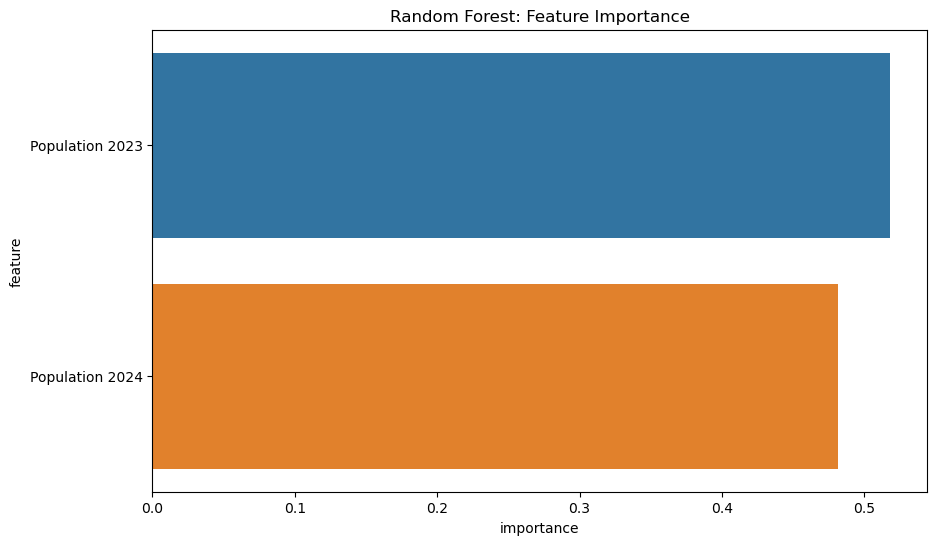

In [45]:
def random_forest_regression(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Random Forest Regression - MSE: {mse:.4f}, R2: {r2:.4f}")
    
    # Visualize predictions vs actual
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual Growth Rate')
    plt.ylabel('Predicted Growth Rate')
    plt.title('Random Forest Regression: Actual vs Predicted Growth Rates')
    plt.show()
    
    # Feature importance
    feature_importance = pd.DataFrame({'feature': features, 'importance': model.feature_importances_})
    feature_importance = feature_importance.sort_values('importance', ascending=False)
    plt.figure(figsize=(10, 6))
    sns.barplot(x='importance', y='feature', data=feature_importance)
    plt.title('Random Forest: Feature Importance')
    plt.show()
    
    return model

rf_model = random_forest_regression(X, y)

# Random Forest Regression Results Summary

**Mean Squared Error (MSE):** 0.0001  
**Interpretation:** The model's predictions are very accurate, with an average squared difference between predicted and actual growth rates of just 0.0001. This low MSE indicates that the model's predictions closely match the actual values.

**R-squared (R²):** 0.4275  
**Interpretation:** The model explains approximately 42.75% of the variance in the population growth rates. This means that the Random Forest model captures a moderate amount of the underlying patterns in the data.

## Comparison with Linear Regression

The Random Forest model has the same MSE (0.0001) as the Linear Regression model, indicating similarly accurate predictions.  
However, the R² value has improved from 0.3328 (Linear Regression) to 0.4275 (Random Forest), showing that the Random Forest model explains about 9.47% more of the variance in growth rates.

## Key Insights

**Improved Performance:** The Random Forest model outperforms the Linear Regression model in terms of explaining variance, likely due to its ability to capture non-linear relationships and interactions between features.  
**Complex Patterns:** The increase in R² suggests that there are indeed non-linear relationships or interactions in the data that the Random Forest model is better able to capture.  
**Remaining Unexplained Variance:** While the model explains 42.75% of the variance, there's still 57.25% unexplained, indicating that other factors not included in the model may influence growth rates.  
**Consistent Accuracy:** The low MSE in both models suggests that while the Random Forest explains more variance, both models make similarly accurate predictions on average.

## Conclusion

The Random Forest Regression model shows an improvement over the Linear Regression model, particularly in its ability to explain the variance in growth rates. This suggests that the relationship between the input features and growth rates is complex and non-linear. However, there's still room for improvement, possibly through feature engineering or incorporating additional relevant data.

This summary provides a comprehensive explanation of the Random Forest Regression results, comparing them to the Linear Regression model and offering insights into the model's performance and potential areas for further improvement.
